# HW 
- Use the cancer data used below (or the first two columns of the iris data set) - for bonus, bring your own data set
- Normalize, test-train split the data
- Train models from SVM (linear and rbf kernels), LogRegression (2 values of C), KNN (3 neighbor values)
- Create two tables, one for train, one for test - that represent the Model, description, Precision, Recall, f1 score on each line
- Pick one of the Models and show the feature importance

In [124]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn.preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets, svm, neighbors
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.neighbors import KNeighborsRegressor as KNN

In [105]:
cancer = pd.read_csv('../data/wdbc.data.txt', header=None)

In [106]:
y = (cancer[1]=='M').astype(int)
X = cancer[[*range(2,31)]]
X = sklearn.preprocessing.MinMaxScaler().fit_transform(x)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

In [132]:
model = svm.SVC(kernel='linear').fit(X_train, y_train)

precision0,recall0,fscore0,support0 = score(y_train,model.predict(X_train))
precision0a,recall0a,fscore0a,support0a = score(y_test,model.predict(X_test))

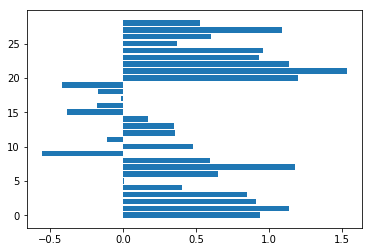

In [133]:
coef = model.coef_[0]
plt.barh(list(range(coef.shape[0])), coef, align='center')
plt.show()

In [126]:
model = svm.SVC(kernel='rbf').fit(X_train, y_train)

precision1,recall1,fscore1,support1 = score(y_train,model.predict(X_train))
precision1a,recall1,fscore1a,support1a = score(y_test,model.predict(X_test))

In [130]:
model = LogReg(C=5).fit(X_train, y_train)

precision2,recall2,fscore2,support2 = score(y_train,model.predict(X_train))
precision2a,recall2a,fscore2a,support2a = score(y_test,model.predict(X_test))

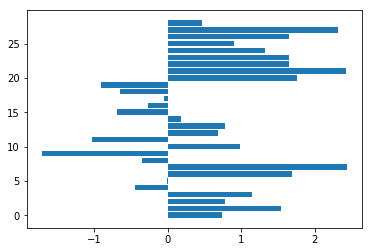

In [131]:
coef = model.coef_[0]
plt.barh(list(range(coef.shape[0])), coef, align='center')
plt.show()

In [111]:
model = LogReg(C=10).fit(X_train, y_train)

precision3,recall3,fscore3,support3 = score(y_train,model.predict(X_train))
precision3a,recall3a,fscore3a,support3a = score(y_test,model.predict(X_test))

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97        64
          1       0.98      0.94      0.96        49

avg / total       0.97      0.96      0.96       113



In [112]:
model.predict(X_train)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [125]:
model= neighbors.KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train) 
model.predict(X_train)

array([ 1. ,  1. ,  0. ,  0. ,  1. ,  1. ,  1. ,  0.5,  0. ,  1. ,  0. ,
        1. ,  0. ,  1. ,  1. ,  0.5,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,
        0. ,  0.5,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ,  1. ,  0.5,
        0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,  1. ,  1. ,  1. ,  0.5,
        0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ,  1. ,  0. ,  1. ,  0. ,
        0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        1. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0.5,
        0. ,  0.5,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,
        1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  1. ,  0. ,
        1. ,  1. ,  0.5,  0. ,  0. ,  0. ,  1. ,  1. ,  1. ,  0. ,  0. ,
        0. ,  0. ,  1. ])

In [121]:
X_test

array([[ 0.76809125,  0.5836997 ,  0.75813696, ...,  0.46485623,
         0.89106529,  0.30317366],
       [ 0.21860949,  0.49983091,  0.21035174, ...,  0.05781949,
         0.16546392,  0.33096787],
       [ 0.10951772,  0.14169767,  0.11174072, ...,  0.07984026,
         0.24955326,  0.41711019],
       ..., 
       [ 0.46660987,  0.32972607,  0.44647917, ...,  0.15031949,
         0.28989691,  0.18963138],
       [ 0.23233471,  0.38755495,  0.22527814, ...,  0.09297125,
         0.28395189,  0.29765425],
       [ 0.36816697,  0.17010484,  0.35298183, ...,  0.17180511,
         0.42989691,  0.3043564 ]])

In [117]:
model= KNN(n_neighbors=2).fit(X_train, y_train) 
print(classification_report(y_train, model.predict(X_train)))

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

In [ ]:
model= KNN(n_neighbors=2).fit(X_train, y_train) 

precision4,recall4,fscore4,support4 = score(y_train,model.predict(X_train)) 
precision4a,recall4a,fscore4a,support4a = score(y_test,model.predict(X_test))

In [ ]:
model= KNN(n_neighbors=5).fit(X_train, y_train) 

precision5,recall5,fscore5,support5 = score(y_train,model.predict(X_train))
precision5a,recall5a,fscore5a,support5a = score(y_test,model.predict(X_test))

In [ ]:
model= KNN(n_neighbors=10).fit(X_train, y_train) 

precision6,recall6,fscore6,support6 = score(y_train,model.predict(X_train)) 
precision6a,recall6a,fscore6a,support6a = score(y_test,model.predict(X_test))

In [ ]:
MTrain = pd.DataFrame({'Model':['SVM', 'SVM', 'LogReg', 'LogReg', 'KNN', 'KNN', 'KNN']})

DTrain = pd.DataFrame({'Description':['Linear', 'RBF', 'C = 5', 'C = 10', 'V = 2', 'V = 5', 'V = 10']})

PTrain = pd.DataFrame({'Precision':[np.mean(precision), np.mean(precision1) , np.mean(precision2) , np.mean(precision3)
                                     , np.mean(precision4), np.mean(precision5), np.mean(precision6)]})

RTrain = pd.DataFrame({'Recall':[np.mean(recall), np.mean(recall1) , np.mean(recall2) , np.mean(recall3)
                                     , np.mean(recall4), np.mean(recall5), np.mean(recall6)]})

FTrain = pd.DataFrame({'F1 Score':[np.mean(fscore), np.mean(fscore1) , np.mean(fscore2) , np.mean(fscore3)
                                     , np.mean(fscore4), np.mean(fscore5), np.mean(fscore6)]})

MTrain.join(DTrain).join(PTrain).join(RTrain).join(Ftrain)